In [76]:
import pandas as pd
from plotnine import *
import numpy as np

In [116]:
df = pd.read_csv('outFLcvar.txt', sep=' ', names=['file','it','LB','UB','Gap','FeasCut','OptCut','PartSize','time'])
df['nScen'] = df['file'].str.extract(r'txt_(\d*)_').astype('int')
df['method'] = df['file'].str.extract(r'_([ampsf]).out')
df['instance'] = df['file'].str.extract(r'FLCVAR_(.*).txt')
det = df['file'].str.split('_', expand=True)
df['family']=det[1]
df['pNumber']=det[2]
df['config']=det[3].str.extract(r'(\d)')

In [117]:
df['instance'].unique()

array(['cap41', 'cap42', 'cap43', 'cap44', 'cap61', 'cap62', 'cap63',
       'cap64', 'cap71', 'cap72', 'cap73', 'cap74'], dtype=object)

In [118]:
#df['time'].isna()
#df['instance'] = pd.Categorical(df['instance'], categories=['cap61','cap62','cap63','cap64','cap101','cap102','cap103','cap104','cap131','cap132','cap133','cap134'])
df['instance'] = pd.Categorical(df['instance'], categories=['cap41','cap42','cap43','cap44','cap61','cap62','cap63','cap64','cap71','cap72','cap73','cap74'])
#df['nScen']  = pd.Categorical(df['nScen'], categories=['100','500','1000','2500','5000'])



In [119]:
df.loc[df['time'] > 7200,'time']=np.nan

In [120]:
df.groupby(['instance','nScen'], dropna=True)['LB'].max()

instance  nScen
cap41     100      6.209572e+05
          500      6.272397e+05
          1000     6.292218e+05
          2500     6.300707e+05
          5000     6.348539e+05
cap42     100      6.130257e+05
          500      6.195779e+05
          1000     6.215214e+05
          2500     6.245892e+05
          5000     6.253830e+05
cap43     100      6.127561e+05
          500      6.192873e+05
          1000     6.212033e+05
          2500     6.294370e+05
          5000     6.287133e+05
cap44     100      6.127561e+05
          500      6.192873e+05
          1000     6.219020e+05
          2500     6.344510e+05
          5000     6.315668e+05
cap61     100      7.048524e+05
          500      7.101091e+05
          1000     7.116988e+05
          2500     7.131338e+05
          5000     7.271973e+05
cap62     100      6.842076e+05
          500      6.907198e+05
          1000     6.905071e+05
          2500     7.016030e+05
          5000     7.122574e+05
cap63     100      6.791

In [121]:
df.groupby(['instance','nScen'])['LB'].var().sort_values(ascending=False)

instance  nScen
cap74     5000     6.104999e+09
cap73     5000     4.289413e+09
cap72     5000     2.210209e+09
cap74     1000     1.951381e+09
cap73     2500     9.815021e+08
cap71     5000     5.257848e+08
cap64     2500     3.919829e+08
          5000     1.396592e+08
cap62     5000     1.017162e+08
cap61     5000     5.872964e+07
cap63     2500     4.186036e+07
cap44     2500     3.807289e+07
cap71     2500     3.764977e+07
cap62     2500     2.787783e+07
cap72     2500     2.626716e+07
cap63     5000     2.122194e+07
cap44     5000     1.970385e+07
cap43     2500     1.429527e+07
          5000     9.685697e+06
cap41     5000     5.088959e+06
cap74     2500     3.860041e+06
cap64     1000     3.056074e+06
cap42     5000     2.658787e+06
          2500     1.395467e+06
cap44     1000     1.220563e+05
cap61     2500     3.007755e-03
cap42     1000     6.528639e-07
cap73     1000     0.000000e+00
cap72     500      0.000000e+00
          100      0.000000e+00
cap73     100      0.000

In [122]:
df.groupby(['nScen','method'])['time'].count() 

nScen  method
100    a         12
       f         12
       m         12
       s         12
500    a         12
       f         12
       m         12
       s         12
1000   a         12
       f         12
       m         11
       s          9
2500   a         12
       f          6
       m          9
       s          2
5000   a         12
       f          3
       m          1
       s          0
Name: time, dtype: int64

In [123]:
df.columns

Index(['file', 'it', 'LB', 'UB', 'Gap', 'FeasCut', 'OptCut', 'PartSize',
       'time', 'nScen', 'method', 'instance', 'family', 'pNumber', 'config'],
      dtype='object')

In [124]:
df['rank']=df.groupby(['nScen','method'])['time'].rank('min')/df['instance'].nunique()


In [125]:
maxRank = df.groupby(['nScen','method'])['rank'].max().reset_index()
df2 = df.copy()
for row in maxRank.iterrows():
    df2.loc[len(df2)] = [None,None,None,None,None,None,None,None,0,row[1]['nScen'],row[1]['method'],None,None,None,None,0]
    if (row[1]['rank']<1):
        df2.loc[len(df2)] = [None,None,None,None,None,None,None,None,7200,row[1]['nScen'],row[1]['method'],None,None,None,None,row[1]['rank']]

In [131]:
df2['Algorithm'] = df2['method'].replace({'a': 'Adaptive', 'm':'Multi', 's':'Single', 'f':'Det. Equiv.'})

/opt/homebrew/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 10 rows containing missing values.


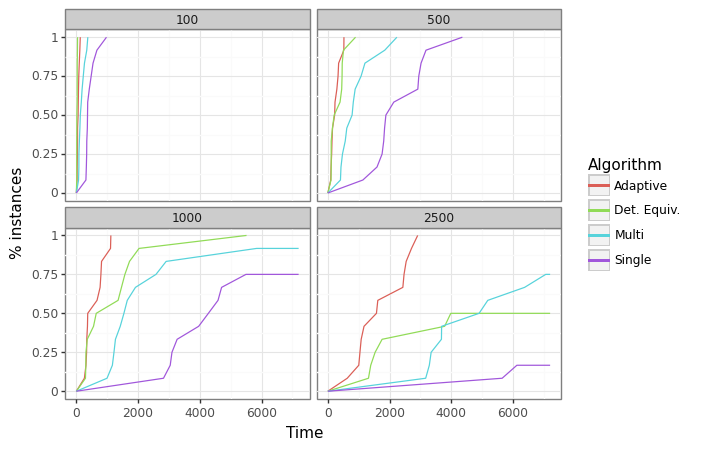

<ggplot: (673457483)>

In [132]:
ggplot(df2[df2['nScen']!=5000], aes(x='time', y='rank', color='Algorithm', group='Algorithm')) + geom_line() + facet_wrap('nScen')\
+ xlab('Time') + ylab('% instances') + theme_bw() + ylim(0,1)\
#+ scale_x_log10(breaks=[10,60,300, 900, 3600]) 

In [71]:
df

,file,it,LB,UB,Gap,FeasCut,OptCut,PartSize,time,nScen,method,instance,family,pNumber,config,rank
0,FLCVAR_cap41.txt_1000_a.out:FinalReport:,12,629221.844684,629221.844684,0.0,0,54441,161,311.512501,1000,a,cap41,cap41.txt,1000,NaN,0.166667
1,FLCVAR_cap41.txt_1000_f.out:FinalReport:,0,629221.844684,629221.844684,0.0,0,0,0,353.739938,1000,f,cap41,cap41.txt,1000,NaN,0.333333
2,FLCVAR_cap41.txt_1000_m.out:FinalReport:,1,629221.844684,629221.844684,0.0,0,170798,1000,1914.423776,1000,m,cap41,cap41.txt,1000,NaN,0.666667
3,FLCVAR_cap41.txt_1000_s.out:FinalReport:,1,629221.844684,629221.844684,0.0,0,2192,1000,3097.197149,1000,s,cap41,cap41.txt,1000,NaN,0.250000
4,FLCVAR_cap41.txt_100_a.out:FinalReport:,9,620957.17356,620957.17356,0.0,0,7633,27,39.721806,100,a,cap41,cap41.txt,100,NaN,0.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,FLCVAR_cap74.txt_500_a.out:FinalReport:,18,829137.569732,829137.569732,0.0,0,24490,74,151.357165,500,a,cap74,cap74.txt,500,NaN,0.416667
222,FLCVAR_cap74.txt_500_f.out:FinalReport:,0,829137.569732,829137.569732,0.0,0,0,0,897.017017,500,f,cap74,cap74.txt,500,NaN,1.000000
223,FLCVAR_cap74.txt_500_m.out:FinalReport:,1,829137.569732,829137.569732,0.0,0,92843,500,563.162144,500,m,cap74,cap74.txt,500,NaN,0.333333
224,FLCVAR_cap74.txt_500_s.out:FinalReport:,1,829137.569732,829137.569732,0.0,0,3171,500,1809.587989,500,s,cap74,cap74.txt,500,NaN,0.333333


In [20]:
df.groupby(['instance','nScen'])['LB'].min()

instance  nScen
cap41     100      6.209572e+05
          500      6.272397e+05
          1000     6.292218e+05
          2500     6.300707e+05
          5000     6.303421e+05
cap42     100      6.130257e+05
          500      6.195779e+05
          1000     6.215214e+05
          2500     6.222266e+05
          5000     6.225587e+05
cap43     100      6.127561e+05
          500      6.192873e+05
          1000     6.212033e+05
          2500     6.218752e+05
          5000     6.221532e+05
cap44     100      6.127561e+05
          500      6.192873e+05
          1000     6.212033e+05
          2500     6.218752e+05
          5000     6.221532e+05
cap61     100      7.048524e+05
          500      7.101091e+05
          1000     7.116988e+05
          2500     7.131338e+05
          5000     7.139237e+05
cap62     100      6.842076e+05
          500      6.907198e+05
          1000     6.905071e+05
          2500     6.924578e+05
          5000     6.932886e+05
cap63     100      6.791

In [142]:
df['PartSizeRel'] = df['PartSize']/df['nScen'].astype('int')
#df[df['method']=='a'].pivot(index='instance',columns='nScen', values=['it','PartSizeRel'])
df[df['method']=='a'].pivot_table(index='nScen', columns='method', values=['it','PartSizeRel'])

,PartSizeRel,it
method,a,a
nScen,,
100,0.241667,10.500000
500,0.154833,15.166667
1000,0.152750,20.333333
2500,0.134200,26.500000
5000,0.103617,27.750000


In [170]:
res = df[df['method']!='f'].pivot_table(index='nScen', columns='method', values=['time','OptCut'])
res.columns

MultiIndex([('OptCut', 'a'),
            ('OptCut', 'm'),
            ('OptCut', 's'),
            (  'time', 'a'),
            (  'time', 'm'),
            (  'time', 's')],
           names=[None, 'method'])

In [176]:
print(res.swaplevel(axis=1).sort_index(axis=1).to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrrr}
\toprule
method & \multicolumn{2}{l}{a} & \multicolumn{2}{l}{m} & \multicolumn{2}{l}{s} \\
{} &    OptCut &    time &    OptCut &    time &  OptCut &    time \\
nScen &           &         &           &         &         &         \\
\midrule
100   &  11466.67 &   63.84 &  23674.58 &  176.83 & 3183.33 &  456.03 \\
500   &  38184.42 &  255.75 & 104422.83 &  944.64 & 3260.92 & 2380.12 \\
1000  &  75591.67 &  603.78 & 223494.92 & 2045.49 & 3588.00 & 3916.84 \\
2500  & 172196.75 & 1763.92 & 460162.58 & 4519.76 & 2359.08 & 5884.54 \\
5000  & 263517.00 & 3763.25 & 696019.17 & 5535.80 & 1229.83 &     NaN \\
\bottomrule
\end{tabular}



/var/folders/l3/bdd4cn2n54n618r3kn2qtq6w0000gn/T/ipykernel_54793/2149590436.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.


In [146]:
df[df['method']=='a'].pivot(index='instance',columns='nScen', values='it')

nScen,100,500,1000,2500,5000
instance,,,,,
cap41,9,10,12,20,20
cap42,8,12,17,28,22
cap43,12,23,27,28,39
cap44,10,18,22,32,37
cap61,9,11,15,22,14
cap62,7,13,17,24,23
cap63,17,18,27,31,25
cap64,10,15,22,34,31
cap71,9,12,15,21,24
